In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score

import scipy.stats as stats
import seaborn as sns

import category_encoders as ce

import plotly.express as px
import plotly.graph_objects as go

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings('ignore')

import re

from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

import math
stopwords = set(stopwords.words('english'))
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oviya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [ ]:
reviews = pd.read_csv('Final_reviews.csv')

In [ ]:
meta_data = pd.read_csv('Final_meta_data.csv')

In [ ]:
ratings = pd.read_csv('Final_ratings.csv')

In [ ]:
reviews.head()

,Unnamed: 0,reviewerID,asin,reviewText,summary
0,0,A1F6404F1VG29J,B000F83SZQ,I enjoy vintage books and movies so I enjoyed ...,Nice vintage story
1,1,AN0N05A9LIJEQ,B000F83SZQ,This book is a reissue of an old one; the auth...,Different...
2,2,A795DMNCJILA6,B000F83SZQ,This was a fairly interesting read. It had ol...,Oldie
3,3,A1FV0SX13TWVXQ,B000F83SZQ,I'd never read any of the Amy Brewster mysteri...,I really liked it.
4,4,A3SPTOKDG7WBLN,B000F83SZQ,"If you like period pieces - clothing, lingo, y...",Period Mystery


In [ ]:
reviews['reviewText']=reviews['reviewText'].apply(str)

In [ ]:
import string

# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
reviews['reviewText'] = reviews['reviewText'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [ ]:
reviews['reviewText']

In [ ]:
reviews['reviews']=reviews['reviewText']+reviews['summary']
reviews=reviews.drop(['reviewText', 'summary'], axis=1)
reviews.head()

,Unnamed: 0,asin,rating,sentiment,reviews
0,0,B000F83SZQ,5,1,I enjoy vintage books and movies so I enjoyed ...
1,1,B000F83SZQ,4,1,This book is a reissue of an old one; the auth...
2,2,B000F83SZQ,4,1,This was a fairly interesting read. It had ol...
3,3,B000F83SZQ,5,1,I'd never read any of the Amy Brewster mysteri...
4,4,B000F83SZQ,4,1,"If you like period pieces - clothing, lingo, y..."


In [ ]:
ratings

,Unnamed: 0,userID,productID,rating
0,0,A1F6404F1VG29J,B000F83SZQ,5
1,1,AN0N05A9LIJEQ,B000F83SZQ,4
2,2,A795DMNCJILA6,B000F83SZQ,4
3,3,A1FV0SX13TWVXQ,B000F83SZQ,5
4,4,A3SPTOKDG7WBLN,B000F83SZQ,4
...,...,...,...,...
982614,982614,A2Y66HD4J5S7QZ,B00M13FNSS,5
982615,982615,A17YHECC8H9NEY,B00M13FNSS,5
982616,982616,A20KO0BPMNREJL,B00M13FNSS,5
982617,982617,A1BQO66R6OLCCW,B00M13FNSS,5


In [ ]:
meta_data

,Unnamed: 0,title,also_buy,brand,also_view,asin,Correct_Category
0,0,Not_known,"['B007NLCJBC', 'B01FARODH8']",Arthur K. Barnes,"['B000FBF81K', 'B00PBDMER8']",B000FA5KKA,Science Fiction & Fantasy
1,1,Not_known,"['B00AYWTHZS', 'B071CTK28D']",Visit Amazon's Paul A. Craig Page,['B00AYWTHZS'],B000FA5M3K,Engineering & Transportation
2,2,Not_known,[],Jean Marie Stine,[],B000FA5KJQ,Biographies & Memoirs
3,3,Not_known,[],Arthur K. Barnes,[],B000FA5NSO,Science Fiction & Fantasy
4,4,Not_known,"['B000SEGKF2', 'B004774LR0', 'B018LE1KUK', 'B0...",Visit Amazon's Ethan M. Rasiel Page,"['B018LE1KUK', 'B000SEGKF2', 'B007XWFZSA', 'B0...",B000FA5KX2,Business & Money
...,...,...,...,...,...,...,...
491665,491665,Den of Dark Angels eBook,[],Visit Amazon's Kenna McKinnon Page,"['B07LB2LY17', 'B07DMZJ29M', 'B00O3GTJEU', 'B0...",B01HJDS9W6,Science Fiction & Fantasy
491666,491666,Poison Kisses 2: My Best Kept Secret - Kindle ...,"['B01F1X1630', 'B07C7G3YFN', 'B07CYV92TH']",Visit Amazon's Kia Meche' Page,['B01F1X1630'],B01HJENY3Y,Literature & Fiction
491667,491667,Renewing Your Mind!: Secrets to Having All You...,"['B06VVS5NTN', 'B01BWYW7DK', 'B01K7T52JM', 'B0...",Visit Amazon's MICHAEL ENDWELL Page,"['B06VVS5NTN', 'B01K9D9EKE', 'B07HRLXB59', 'B0...",B01HJFVTKS,Religion & Spirituality
491668,491668,Restless Daniel No Ordinary Boy: A child&#39;s...,[],Visit Amazon's Cally Finsbury Page,[],B01HJH8CDS,Literature & Fiction


In [ ]:
ratings

,Unnamed: 0,userID,productID,rating
0,0,A1F6404F1VG29J,B000F83SZQ,5
1,1,AN0N05A9LIJEQ,B000F83SZQ,4
2,2,A795DMNCJILA6,B000F83SZQ,4
3,3,A1FV0SX13TWVXQ,B000F83SZQ,5
4,4,A3SPTOKDG7WBLN,B000F83SZQ,4
...,...,...,...,...
982614,982614,A2Y66HD4J5S7QZ,B00M13FNSS,5
982615,982615,A17YHECC8H9NEY,B00M13FNSS,5
982616,982616,A20KO0BPMNREJL,B00M13FNSS,5
982617,982617,A1BQO66R6OLCCW,B00M13FNSS,5


In [ ]:
reviews

,Unnamed: 0,reviewerID,asin,reviews,rating,sentiment
0,0,A1F6404F1VG29J,B000F83SZQ,i enjoy vintage books and movies so i enjoyed ...,5,1
1,1,AN0N05A9LIJEQ,B000F83SZQ,this book is a reissue of an old one the auth...,4,1
2,2,A795DMNCJILA6,B000F83SZQ,this was a fairly interesting read it had ol...,4,1
3,3,A1FV0SX13TWVXQ,B000F83SZQ,i d never read any of the amy brewster mysteri...,5,1
4,4,A3SPTOKDG7WBLN,B000F83SZQ,if you like period pieces clothing lingo y...,4,1
...,...,...,...,...,...,...
982614,982614,A2Y66HD4J5S7QZ,B00M13FNSS,yasss hunny this is a great read that dre is...,5,1
982615,982615,A17YHECC8H9NEY,B00M13FNSS,i enjoyed this book from beginning to end now ...,5,1
982616,982616,A20KO0BPMNREJL,B00M13FNSS,great book cherika was a fool she let that m...,5,1
982617,982617,A1BQO66R6OLCCW,B00M13FNSS,when i say this was an excellent book please b...,5,1


In [ ]:
rating = ratings["rating"]
reviews = reviews.join(rating)
reviews['rating'].value_counts()

5    575264
4    254013
3     96194
2     34130
1     23018
Name: rating, dtype: int64

In [ ]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['rating'] == 1.0 or row['rating'] == 2.0 or row['rating']==3.0:
        val = '0'
    elif row['rating'] == 4.0 or row['rating'] == 5.0:
        val = '1'
    else:
        val = -1
    return val

In [ ]:
reviews['sentiment'] = reviews.apply(f, axis=1)
reviews

,Unnamed: 0,asin,rating,sentiment,reviews
0,0,B000F83SZQ,5,1,I enjoy vintage books and movies so I enjoyed ...
1,1,B000F83SZQ,4,1,This book is a reissue of an old one; the auth...
2,2,B000F83SZQ,4,1,This was a fairly interesting read. It had ol...
3,3,B000F83SZQ,5,1,I'd never read any of the Amy Brewster mysteri...
4,4,B000F83SZQ,4,1,"If you like period pieces - clothing, lingo, y..."
...,...,...,...,...,...
982614,982614,B00M13FNSS,5,1,Yasss hunny! This is a great read. That Dre is...
982615,982615,B00M13FNSS,5,1,I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...
982616,982616,B00M13FNSS,5,1,Great book! Cherika was a fool. She let that m...
982617,982617,B00M13FNSS,5,1,When I say this was an excellent book please b...


In [ ]:
reviews.to_csv('review2.csv')

In [ ]:
reviews['sentiment'].value_counts()

1    829277
0    153342
Name: sentiment, dtype: int64

In [ ]:
reviews=reviews.drop(['reviewerID'], axis=1)
#Creating a copy 
clean_reviews=reviews.copy()

In [ ]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
reviews['reviews']=reviews['reviews'].apply(lambda x:review_cleaning(x))
reviews.head()

,Unnamed: 0,asin,rating,sentiment,reviews
0,0,B000F83SZQ,5,1,i enjoy vintage books and movies so i enjoyed ...
1,1,B000F83SZQ,4,1,this book is a reissue of an old one the autho...
2,2,B000F83SZQ,4,1,this was a fairly interesting read it had old...
3,3,B000F83SZQ,5,1,id never read any of the amy brewster mysterie...
4,4,B000F83SZQ,4,1,if you like period pieces clothing lingo you ...


In [ ]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
nlp = English()
stopwords = list(STOP_WORDS)
punctuations = string.punctuation

In [ ]:
 !pip3 install spacy

In [ ]:
def tokenizer(sentence):
    mytokens = nlp(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    return mytokens

In [ ]:
reviews2 = reviews.sample(frac = 0.1, replace = False, random_state=43)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import string
import pickle
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Basic function to clean the text 
def clean_text(text):     
    return text.strip().lower()

In [ ]:
vectorizer = CountVectorizer(tokenizer = tokenizer, ngram_range=(1,1)) 
tfvectorizer = TfidfVectorizer(tokenizer = tokenizer)

In [ ]:
X = reviews2['reviews']
y = reviews2['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=77)

In [ ]:
reviews['polarity'] = reviews['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
reviews['review_len'] = reviews['reviews'].astype(str).apply(len)
reviews['word_count'] = reviews['reviews'].apply(lambda x: len(str(x).split()))

In [ ]:
reviews['reviews'] = reviews['reviews'].apply(lambda x: ' '.join([corpus for corpus in x.split() if corpus not in stopwords]))

In [ ]:
stemmer = nltk.stem.SnowballStemmer('english')
reviews.stem_review = reviews.reviews.apply(lambda x: " ".join(stemmer.stem(x) for x in x.split()))
reviews.stem_review

0         enjoy vintag book movi enjoy read book plot un...
1         book reissu old one author born era say nero w...
2         fair interest read old style terminolog glad g...
3         never read ami brewster mysteri one realli hoo...
4         like period piec cloth lingo enjoy mysteri aut...
                                ...                        
982614    yasss hunni great read dre mess cherika refus ...
982615    enjoy book begin end far lex hoe sneaki damn s...
982616    great book cherika fool let man get away much ...
982617    say excel book pleas believ definit page turne...
982618    book everyth hope alexus wise move lawd though...
Name: reviews, Length: 982619, dtype: object

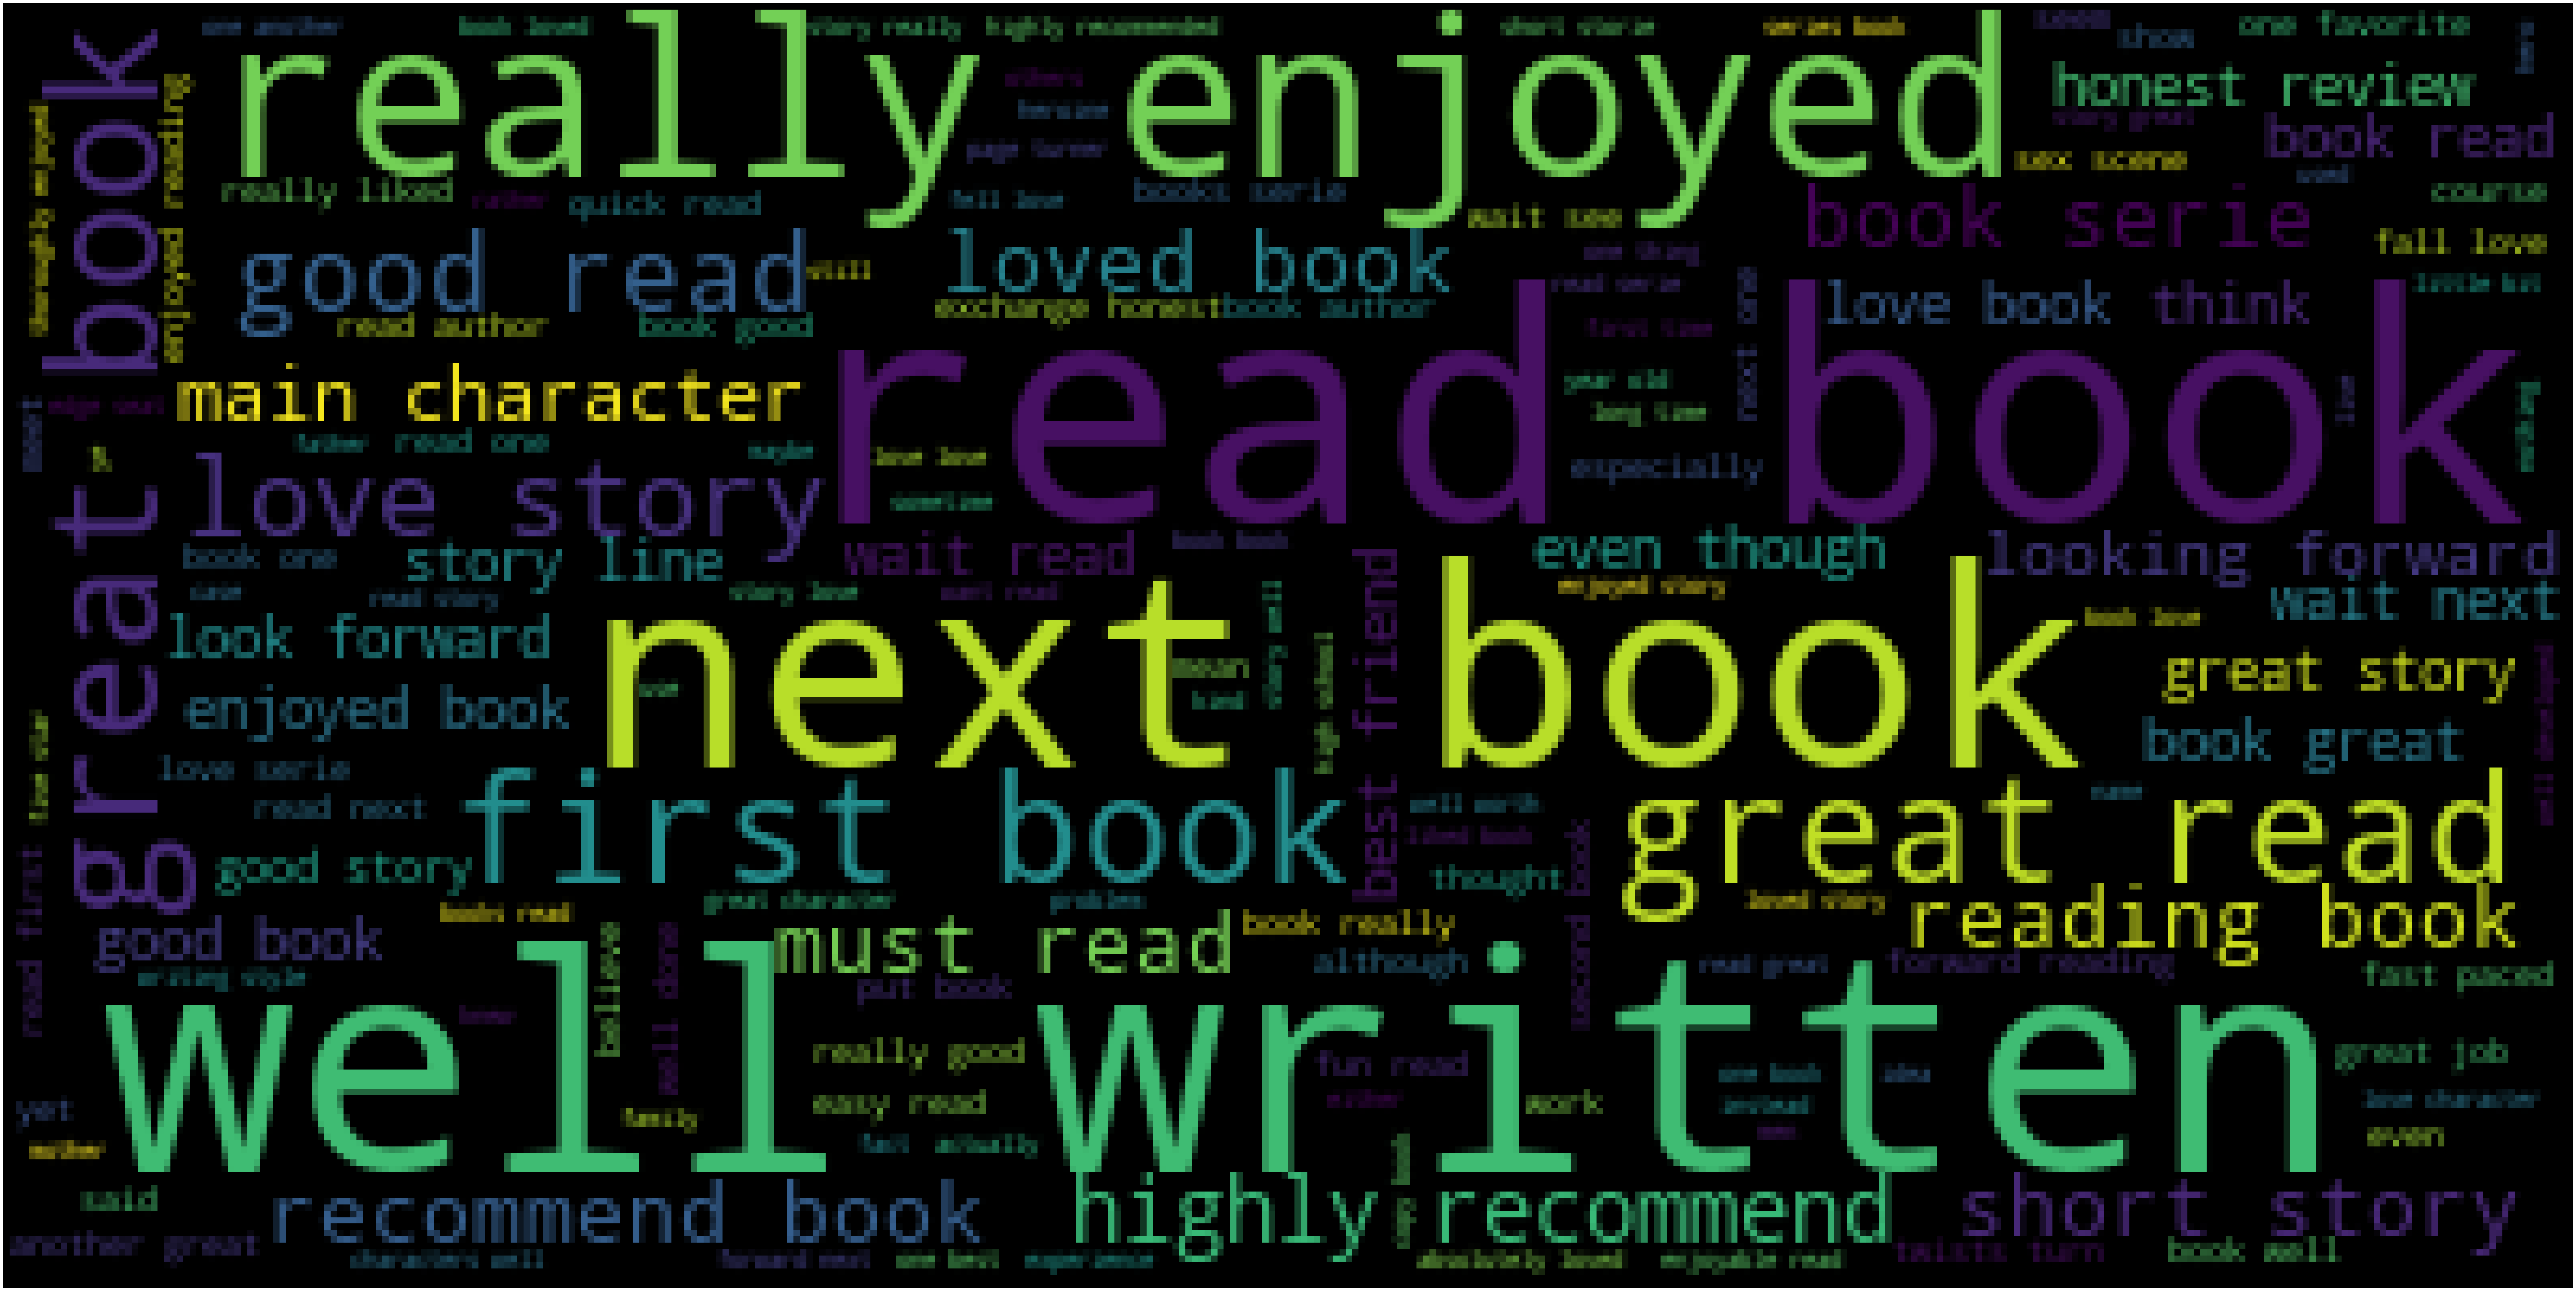

In [ ]:
text = ' '.join(Positive['reviews']).lower()

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 10000,  max_font_size = 50)
    wc.generate(text)
    plt.imshow(wc)
    plt.axis('off')

wc(text,'black','Most Used Words')

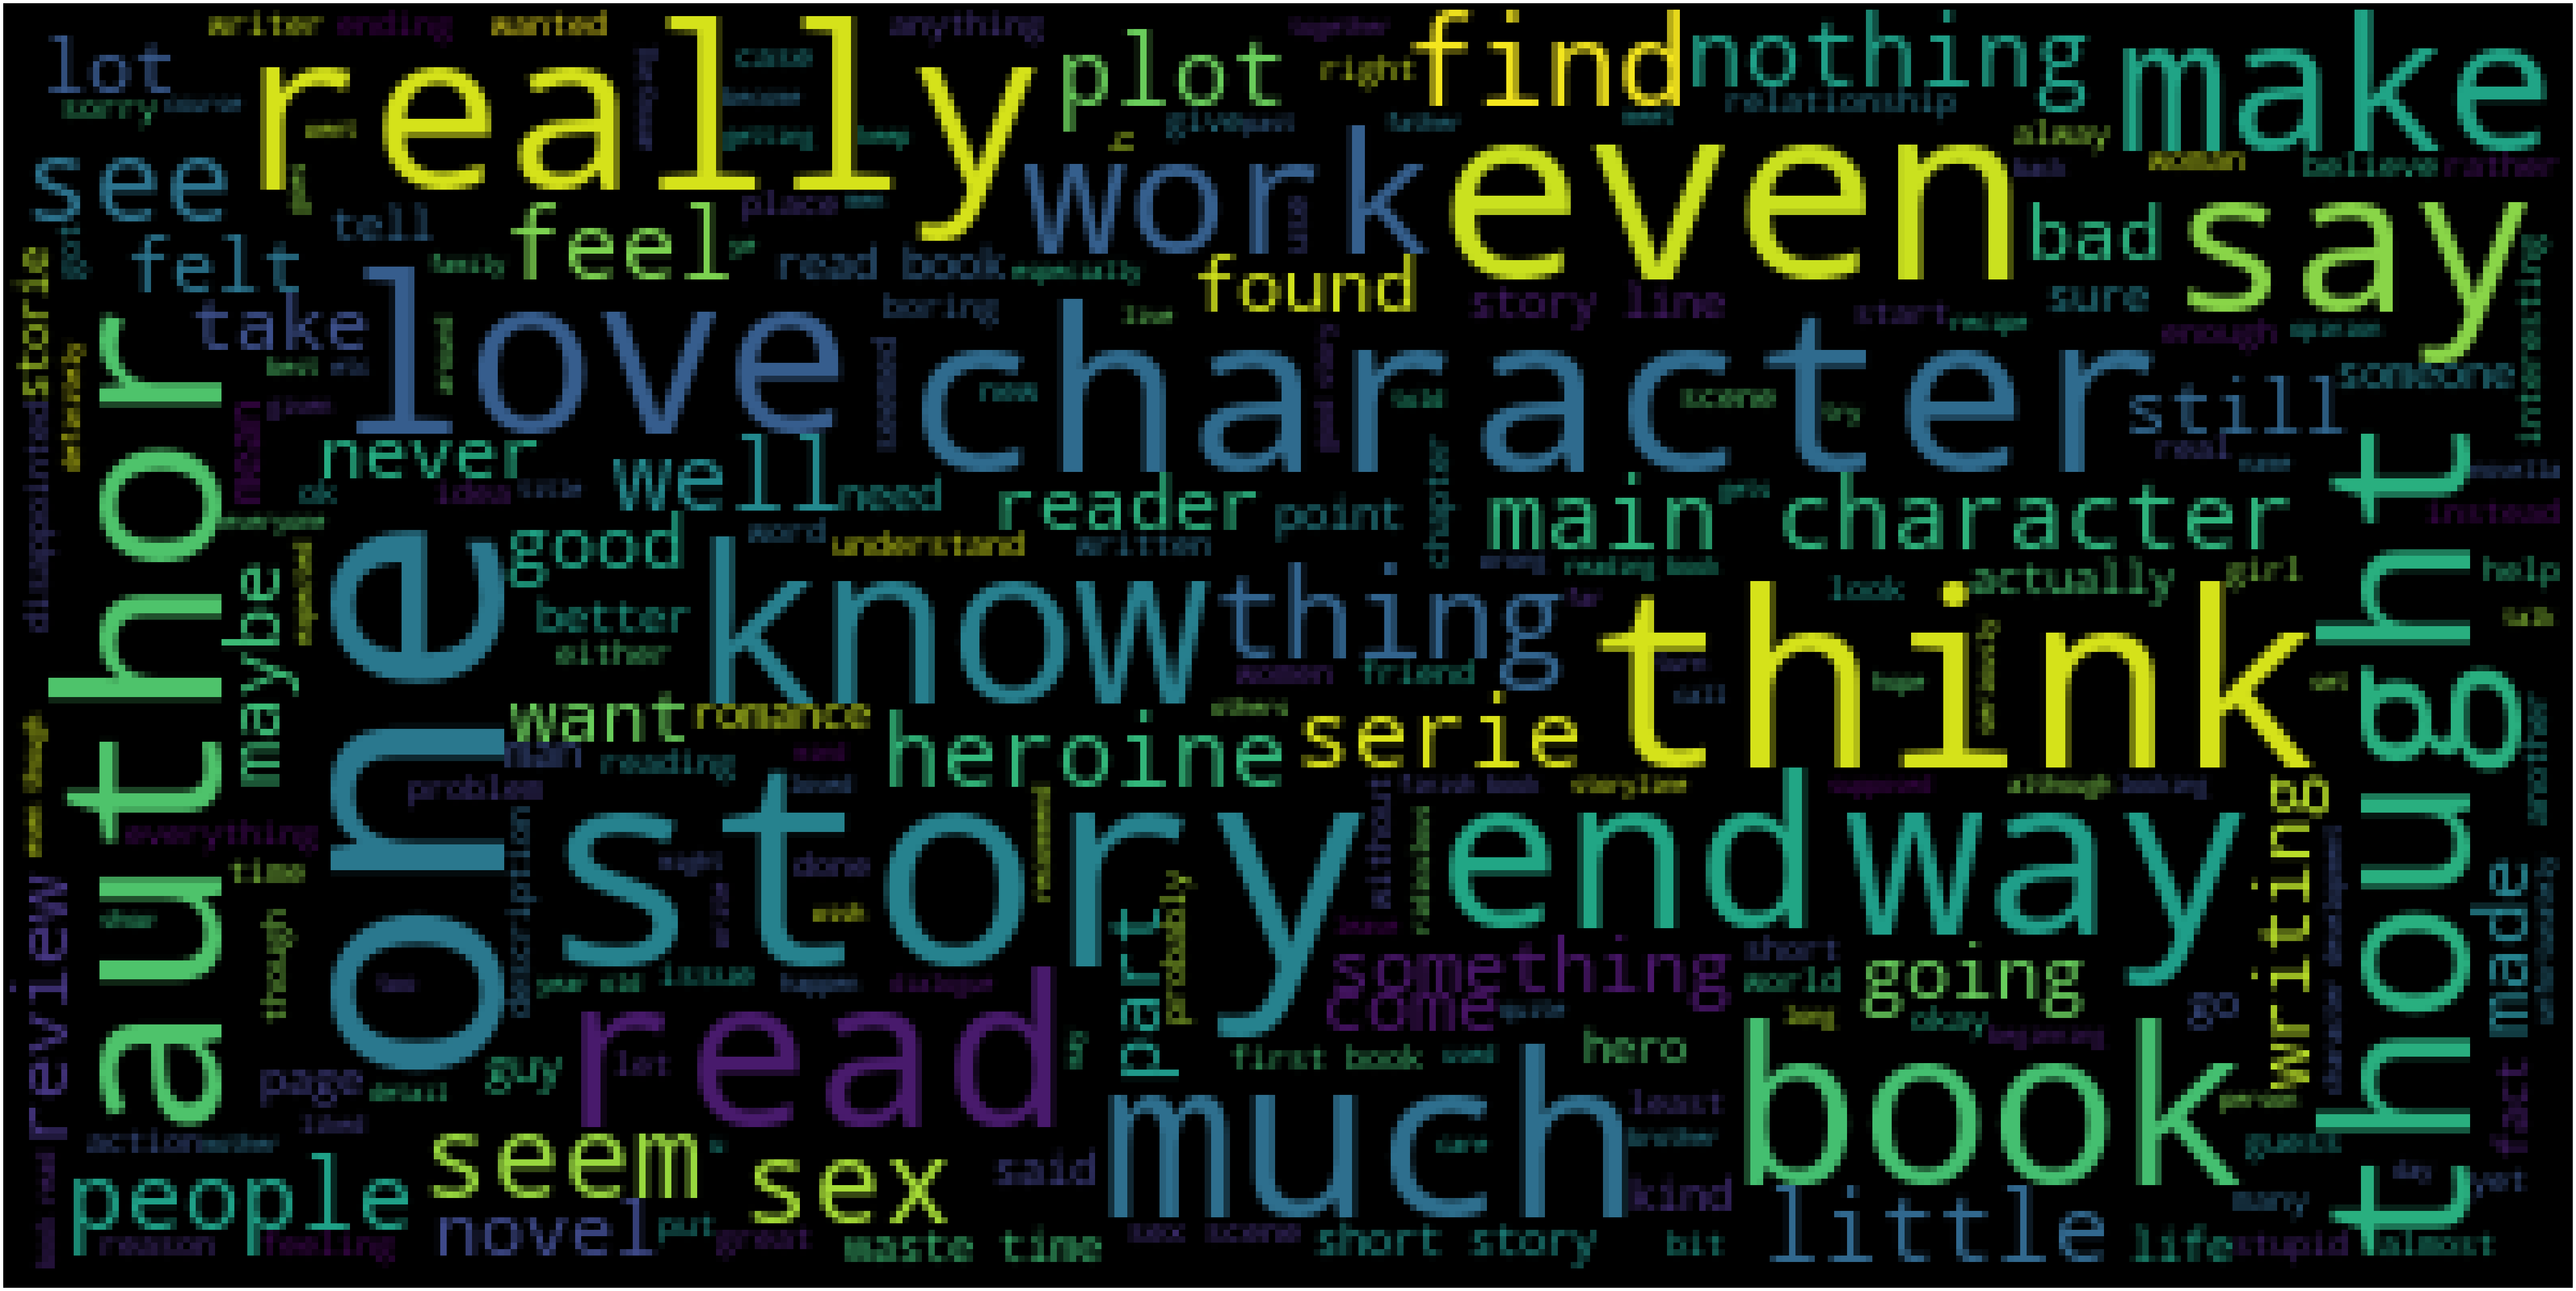

In [ ]:
text = ' '.join(Negative['reviews']).lower()

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 10000,  max_font_size = 50)
    wc.generate(text)
    plt.imshow(wc)
    plt.axis('off')

wc(text,'black','Most Used Words')